In [1]:
!pip install pytrends
from pytrends.request import TrendReq
import pandas as pd
import seaborn as sns

In [2]:
#importar de drive
from google.colab import drive
import os
drive.mount('/content/gdrive')
#abrir el archivo
%cd '/content/gdrive/MyDrive/Data_Sets'
with open("etnias.txt", 'r') as f:
    etn = [line.split(',') for line in f.read().splitlines()]
#ordeno en lista
etnias=[]
for i in range(0,len(etn)):
    etnias.append(etn[i][0])
etnias

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Data_Sets


['gastronomía de india',
 'gastronomía de argentina',
 'gastronomía de chile',
 'gastronomía de italia',
 'gastronomía de japón',
 'gastronomía de china',
 'gastronomía de tailandia',
 'gastronomía de corea']

In [3]:
def get_top_ethnic_foods_in_argentina_prom(etnias, timeframe): #realizar la búsqueda de cada comida étnica para el dataframe solicitado en Argentina, obtiene los datos de Google Trends.
    pytrends = TrendReq(hl='es-AR', tz=360)  #configurar el idioma y la zona horaria para Argentina.
    search_results = {}
    for food in etnias:
        pytrends.build_payload(kw_list=[food], timeframe=timeframe)
        interest_over_time = pytrends.interest_over_time()
        search_results[food] = interest_over_time[food].mean() if not interest_over_time.empty else 0
    return search_results

if __name__ == "__main__":
    tiempo1 = 'today 5-y'
    top_foods_5y = get_top_ethnic_foods_in_argentina_prom(etnias, tiempo1)

    tiempo2 = 'today 1-m'
    top_foods_1m = get_top_ethnic_foods_in_argentina_prom(etnias, tiempo2)

    #crear el diccionario con las etnias y sus valores promedio para 5 años y 1 mes.
    results_dict = {}
    for food in etnias:
        results_dict[food] = (top_foods_5y[food].round(3), top_foods_1m[food].round(3))

In [4]:
df=pd.DataFrame(results_dict,index=["5_y","1_m"]).T
df["crecimiento"]=((df["1_m"]/df["5_y"])-1).round(3) #compara el promedio del últmo mes con el de los últimos 5 años para definir una tendencia
df=df.sort_values('crecimiento',ascending=False)

Text(0.5, 0, '%')

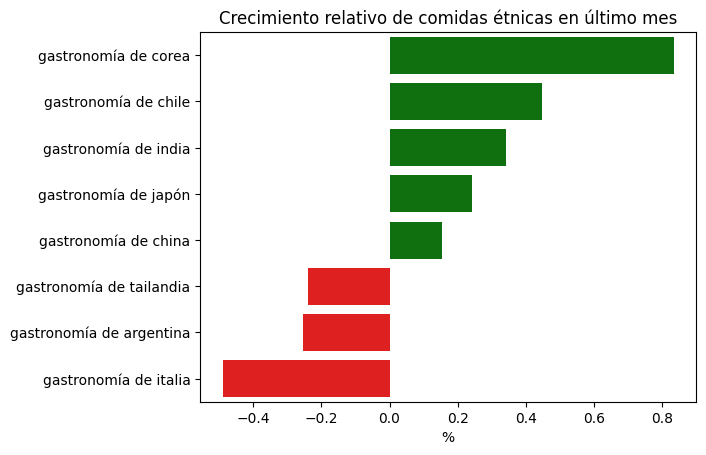

In [5]:
i=0
custom_palette = {} #paleta de color propia, verde para valores mayores a 1 (crecimiento) y rojo para menor a 1 (decreció)
for q in df.crecimiento:
    if q < 0:
        custom_palette[i] = 'r'
    else:
        custom_palette[i] = 'g'
    i=i+1

lista_colores=list(custom_palette.values())
custom_palette = sns.set_palette(sns.color_palette(lista_colores))
ax=sns.barplot(df,y=df.index,x="crecimiento",palette=custom_palette)
ax.set_title("Crecimiento relativo de comidas étnicas en último mes")
ax.set_xlabel("%")

In [3]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


In [1]:
jupyter nbconvert --to PDF notebook.ipynb

SyntaxError: invalid syntax (651952899.py, line 1)